In [1]:
# import libraries which can read h5 files
import h5py
import numpy as np
import matplotlib.pyplot as plt

# change to inline plotting
%matplotlib inline

In [2]:
def file_to_npz(file_name, set_name):
    # read h5 file to numpy array
    f = h5py.File(f'/Tmp/dingqian/Ocean/{file_name}', 'r')
    data = f['Data'][:]

    data_resample = data[::10,:].T # resample per 10 stations
    print(data_resample.shape)
    data_splits = np.split(data_resample, 40, axis=0) # to 90 seconds splits

    for i, data in enumerate(data_splits):
        meta = {}
        meta['data'] = data.astype(np.float64)
        # save meta to npz
        file_prefix = file_name.split('.')[0]

        save_path = f'/Tmp/dingqian/Ocean/splits/{set_name}/{file_prefix}-{i}.npz'
        print(save_path)
        np.savez_compressed(save_path, **meta)
    

In [3]:
file_name = 'Cascadia-North-2021-11-01T215345Z.h5'
set_name = 'train_npz'

file_name = 'Cascadia-North-2021-11-01T225345Z.h5'
set_name = 'test_npz'

file_to_npz(file_name, set_name)



(360000, 3260)
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-0.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-1.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-2.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-3.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-4.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-5.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-6.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-7.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-8.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-9.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-10.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-11.npz
/Tmp/dingqian/Ocean/splits/test_npz/Cascadia-North-2021-11-01T225345Z-1

In [3]:
# read h5 file to numpy array
f = h5py.File(f'/Tmp/dingqian/Ocean/{file_name}', 'r')
data = f['Data'][:]

In [12]:
data_resample = data[::10,:].T
data_resample.shape

(360000, 3260)

In [13]:
data_splits = np.split(data_resample, 40, axis=0) # to 90 seconds split

In [14]:
data_splits[0].shape

(9000, 3260)

In [15]:
def plot_data(data):
    data -= np.median(data, axis=1, keepdims=True)
    data -= np.mean(data, axis=0)
    data /= np.std(data, axis=0)

    data = data[:, 200:400]

    plt.figure(figsize=(10, 8))
    plt.imshow(data.T, vmin=-2.0, vmax=2.0, cmap="seismic", aspect='auto')
    plt.gca().invert_yaxis()
    plt.xlabel("Time")
    plt.ylabel("Station")

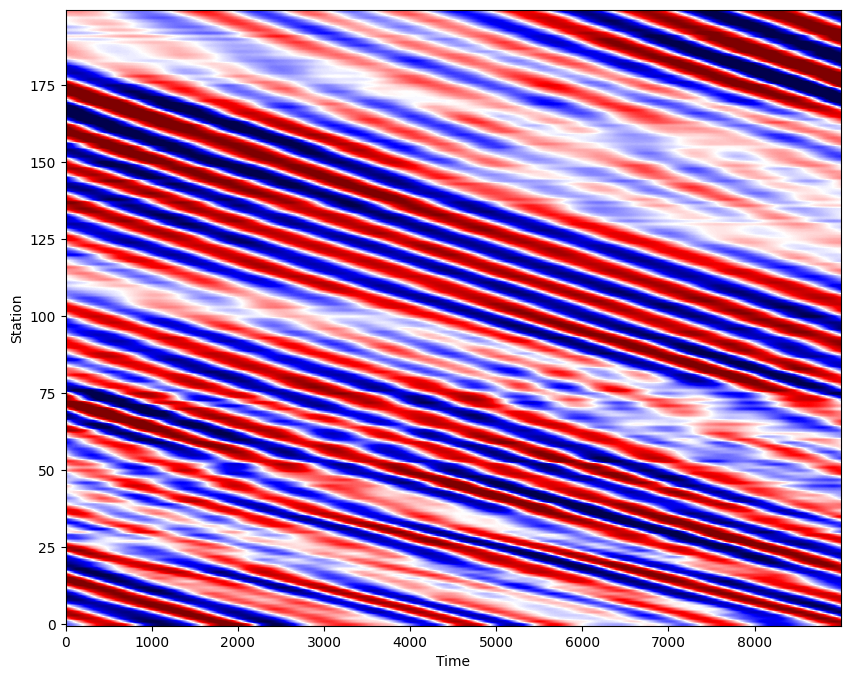

In [16]:
plot_data(data_splits[12])